In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('income_evaluation.csv')

In [ ]:
display(HTML(df.head(5).to_html()))

print(df.info())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [ ]:
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
print('Null values:\n', df.isnull().sum())
print('\nNa values:\n', df.isna().sum())
for i in df.columns:
    print(i, '\t\t', df[i].dtype,'\t\t\t',df[i].isnull().any())
  

Null values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Na values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age 		 int64 			 False
workclass 		 object 			 False
fnlwgt 		 int64 			 False
education 		 object 			 False
education-num 		 int64 			 False
marital-status 		 object 			 False
occupation 		 object 			 False
relationship 		 object 			 False
race 		 object 			 False
sex 		 object 			 False
capital-gain 		 int64 			 False
capital-loss 		 int64 			

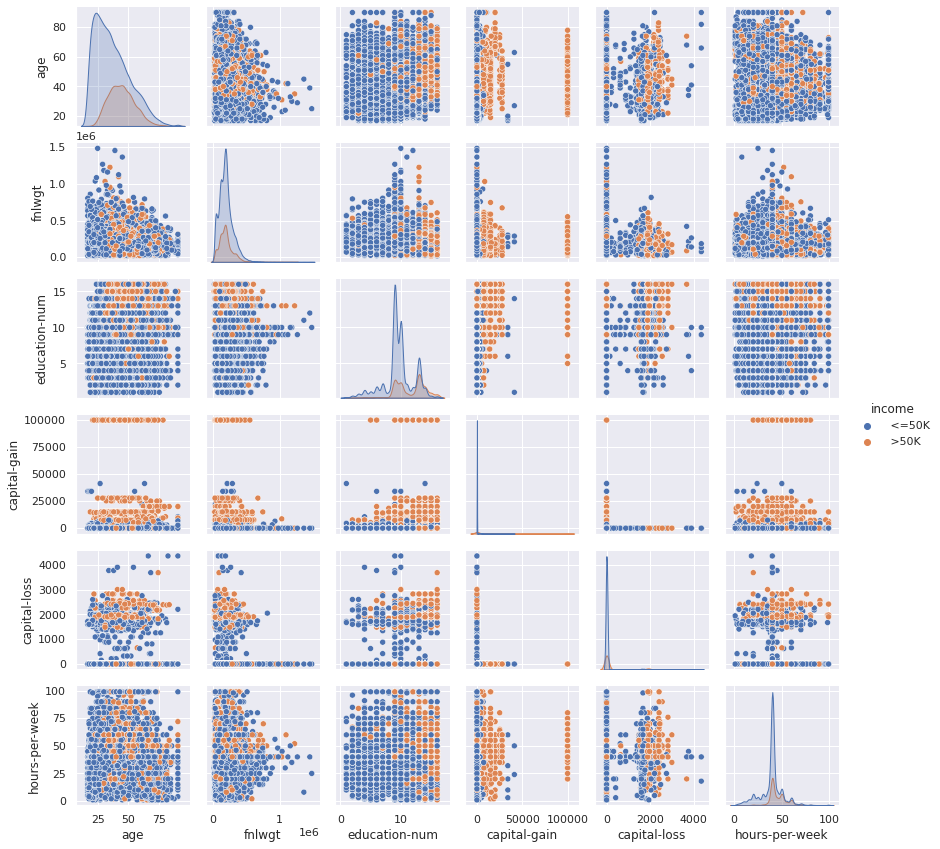

In [ ]:
sns.set()
sns.pairplot(df, hue = 'income', height=2);

In [ ]:
#Implementing the Normalization

numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
c_num = df.select_dtypes(include=numeric).columns.tolist()
c_num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
df=df.replace([' ?'], 'unknown')
display(HTML(df.head(5).to_html()))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


CLASSIFICATION TECHNIQUE:KNN MODEL

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing

In [ ]:
print(df.dtypes)
display(HTML(df.head(5).to_html()))

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Changing it Numerical

df_dummies = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']])
df_dummies
df_dummies.dtypes

dfknn = df.join(df_dummies)
dfknn = dfknn.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'], axis=1)
dfknn = dfknn.drop(['workclass_ Federal-gov','education_ 10th','marital-status_ Divorced','occupation_ Adm-clerical','relationship_ Husband','race_ Amer-Indian-Eskimo','sex_ Female','native-country_ Cambodia'],1)

display(HTML(dfknn.head(5).to_html()))

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_unknown
0,39,77516,13,2174,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Selecting the columns which are Numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = dfknn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

#Implementing the Normalization
for col in cols_numeric:
  dfknn[col]=(dfknn[col]-dfknn[col].min())/(dfknn[col].max()-dfknn[col].min())

display(HTML(dfknn.head(10).to_html()))

Selected numerical columns:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_unknown
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.184932,0.866667,0.000000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.438356,0.100448,0.266667,0.000000,0.0,0.153061,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [ ]:
#Implementing the encoding on Y variable
y = dfknn['income']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
print('encode y :\n', y_encoded)
dfknn['income'] = y_encoded
x = dfknn.drop('income',1)
y = dfknn['income']
display('x:',HTML(x.head(10).to_html()))
print('y:\n', y)

encode y :
 [0 0 0 ... 0 0 1]


'x:'

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_unknown
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.184932,0.866667,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.438356,0.100448,0.266667,0.000000,0.0,0.153061,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.479452

y:
 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64


In [ ]:
#Performing the hold out evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfknn, y_encoded, test_size = 0.2 )

In [ ]:
#Implementing the model 

for k in range(1, 24, 2):
  clf = neighbors.KNeighborsClassifier(k , weights='uniform')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))


K = 1 , Accuracy:  0.9775832949485644 , Precision:  0.9775832949485644 , Recall:  0.9775832949485644
K = 3 , Accuracy:  0.9800399201596807 , Precision:  0.9800399201596807 , Recall:  0.9800399201596807
K = 5 , Accuracy:  0.978504529402733 , Precision:  0.978504529402733 , Recall:  0.978504529402733
K = 7 , Accuracy:  0.975894365115922 , Precision:  0.975894365115922 , Recall:  0.975894365115922
K = 9 , Accuracy:  0.9771226777214801 , Precision:  0.9771226777214801 , Recall:  0.9771226777214801
K = 11 , Accuracy:  0.9752802088131429 , Precision:  0.9752802088131429 , Recall:  0.9752802088131429
K = 13 , Accuracy:  0.9751266697374482 , Precision:  0.9751266697374482 , Recall:  0.9751266697374482
K = 15 , Accuracy:  0.973284200829111 , Precision:  0.973284200829111 , Recall:  0.973284200829111
K = 17 , Accuracy:  0.9729771226777215 , Precision:  0.9729771226777215 , Recall:  0.9729771226777215
K = 19 , Accuracy:  0.9740518962075848 , Precision:  0.9740518962075848 , Recall:  0.97405189620

In [ ]:
for k in range(1, 10, 2):
  clf = neighbors.KNeighborsClassifier(k , weights='uniform',algorithm = 'ball_tree',leaf_size=30)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))

CLASSIFICATION TECHNIQUE: NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:


#Changing the numerical data to categorical data
df_nb = df
df_nb['age'] = pd.cut(df_nb['age'],3)
df_nb['fnlwgt'] = pd.cut(df_nb['fnlwgt'],3)
df_nb['education-num'] = pd.cut(df_nb['education-num'],3)
df_nb['capital-gain'] = pd.cut(df_nb['capital-gain'],2)
df_nb['capital-loss'] = pd.cut(df_nb['capital-loss'],2)
df_nb['hours-per-week'] = pd.cut(df_nb['hours-per-week'],3)


In [ ]:
display('df_nb:',HTML(df_nb.head(10).to_html()))

'df_nb:'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,"(16.927, 41.333]",State-gov,"(10812.58, 503091.667]",Bachelors,"(11.0, 16.0]",Never-married,Adm-clerical,Not-in-family,White,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,<=50K
1,"(41.333, 65.667]",Self-emp-not-inc,"(10812.58, 503091.667]",Bachelors,"(11.0, 16.0]",Married-civ-spouse,Exec-managerial,Husband,White,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(0.902, 33.667]",United-States,<=50K
2,"(16.927, 41.333]",Private,"(10812.58, 503091.667]",HS-grad,"(6.0, 11.0]",Divorced,Handlers-cleaners,Not-in-family,White,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,<=50K
3,"(41.333, 65.667]",Private,"(10812.58, 503091.667]",11th,"(6.0, 11.0]",Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,<=50K
4,"(16.927, 41.333]",Private,"(10812.58, 503091.667]",Bachelors,"(11.0, 16.0]",Married-civ-spouse,Prof-specialty,Wife,Black,Female,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",Cuba,<=50K
5,"(16.927, 41.333]",Private,"(10812.58, 503091.667]",Masters,"(11.0, 16.0]",Married-civ-spouse,Exec-managerial,Wife,White,Female,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,<=50K
6,"(41.333, 65.667]",Private,"(10812.58, 503091.667]",9th,"(0.985, 6.0]",Married-spouse-absent,Other-service,Not-in-family,Black,Female,"(-99.999, 49999.5]","(-4.356, 2178.0]","(0.902, 33.667]",Jamaica,<=50K
7,"(41.333, 65.667]",Self-emp-not-inc,"(10812.58, 503091.667]",HS-grad,"(6.0, 11.0]",Married-civ-spouse,Exec-managerial,Husband,White,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,>50K
8,"(16.927, 41.333]",Private,"(10812.58, 503091.667]",Masters,"(11.0, 16.0]",Never-married,Prof-specialty,Not-in-family,White,Female,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,>50K
9,"(41.333, 65.667]",Private,"(10812.58, 503091.667]",Bachelors,"(11.0, 16.0]",Married-civ-spouse,Exec-managerial,Husband,White,Male,"(-99.999, 49999.5]","(-4.356, 2178.0]","(33.667, 66.333]",United-States,>50K


In [ ]:
# Implementing the hold-out evaluation 
y=df_nb['income']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) 
# Changing categorical data to numerical data
print(df_nb.dtypes)
df_nb=pd.get_dummies(df_nb.drop('income',axis=1))
df_nb['income']=y_encoded
display(HTML(df_nb.head(5).to_html()))

age               category
workclass           object
fnlwgt            category
education           object
education-num     category
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain      category
capital-loss      category
hours-per-week    category
native-country      object
income              object
dtype: object


,"age_(16.927, 41.333]","age_(41.333, 65.667]","age_(65.667, 90.0]",workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_unknown,"fnlwgt_(10812.58, 503091.667]","fnlwgt_(503091.667, 993898.333]","fnlwgt_(993898.333, 1484705.0]",education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,"education-num_(0.985, 6.0]","education-num_(6.0, 11.0]","education-num_(11.0, 16.0]",marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_unknown,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,"capital-gain_(-99.999, 49999.5]","capital-gain_(49999.5, 99999.0]","capital-loss_(-4.356, 2178.0]","capital-loss_(2178.0, 4356.0]","hours-per-week_(0.902, 33.667]","hours-per-week_(33.667, 66.333]","hours-per-week_(66.333, 99.0]",native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_unknown,income
0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,

In [ ]:
# API for GaussianNB
x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y_pred,y_test))

Accuracy by Hold-out Eval: 1.0


In [ ]:
# Performing the N-fold evaluation
y=df_nb['income']
x=df_nb.drop('income',axis=1)
clf = GaussianNB()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by N-fold Cross Validation: 0.5840736453760407


CLASSIFICATION TECHNIQUE: SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Implementing the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(dfknn, y_encoded, test_size=0.2)
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)


Accuracy by hold-out evaluation:  1.0


In [ ]:
x=dfknn.drop('income',axis=1)
y=dfknn['income']
# Performing the N-fold cross validation
clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)
clf=SVC(kernel='rbf', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

FEATURE SELECTION USING FILTER SELECTION

In [ ]:

#Correlation with output variable
cor = dfknn.corr()
cor_target = abs(cor["income"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
print('\nSelected features by Filter model:\n',relevant_features)

dfsvm = dfknn[['age','education-num','capital-gain','hours-per-week','marital-status_ Married-civ-spouse','marital-status_ Never-married','occupation_ Exec-managerial','relationship_ Own-child','sex_ Male','income']]
#print(dfknn_1)

# Implementing the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(dfsvm, y_encoded, test_size=0.2)
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=dfknn.drop('income',axis=1)
y=dfknn['income']
# by N-fold cross validation
clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)
clf=SVC(kernel='rbf', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)'''

FEATURE REDUCTION USING PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(x)
#fit.components_
PCAs = fit.transform(x)
PCA_select = PCAs[:,:3]
df_PCA = pd.DataFrame(data=PCA_select, columns=['PCA1','PCA2','PCA3'])
df_PCA['income'] = y 
display('df_PCA:',HTML(df_PCA.head(10).to_html()))
#Building the model
y_encoded = df_PCA['income']
x_train, x_test, y_train, y_test = train_test_split(df_PCA, y_encoded, test_size = 0.2 )
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)
x=dfknn.drop('income',axis=1)
y=dfknn['income']
# by N-fold cross validation
clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)
clf=SVC(kernel='rbf', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)'''

CLASSIFICATION TECHNIQUE: DECISION TREE AND RANDOM FOREST

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Implementing the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier() # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)

# Implementing the N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)
#Performing the implementation of model
# Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

Tree Accuracy by hold-out evaluation:  1.0
Tree Accuracy by N-fold Cross Validation: 0.8116152122140147
RandomForest Accuracy by N-fold Cross Validation: 0.8555327306075811


FEATURE SELECTION USING FILTER SELECTION

In [ ]:
#Correlation with output variable
cor = dfknn.corr()
cor_target = abs(cor["income"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
print('\nSelected features by Filter model:\n',relevant_features)
dfd = dfknn[['age','education-num','capital-gain','hours-per-week','marital-status_ Married-civ-spouse','marital-status_ Never-married','occupation_ Exec-managerial','relationship_ Own-child','sex_ Male','income']]
#print(dfknn_1)





Selected features by Filter model:
 age                                   0.234037
education-num                         0.335154
capital-gain                          0.223329
hours-per-week                        0.229689
income                                1.000000
marital-status_ Married-civ-spouse    0.444696
marital-status_ Never-married         0.318440
occupation_ Exec-managerial           0.214861
relationship_ Own-child               0.228532
sex_ Male                             0.215980
Name: income, dtype: float64


In [ ]:
# Implementing the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(dfd, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier() # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)

# Implementing the N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)



Tree Accuracy by hold-out evaluation:  1.0
Tree Accuracy by N-fold Cross Validation: 0.814287164661416


In [ ]:
# Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

RandomForest Accuracy by N-fold Cross Validation: 0.8555327306075811


FEATURE REDUCTION USING PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(x)
#fit.components_

PCAs = fit.transform(x)
PCA_select = PCAs[:,:3]
df_PCA = pd.DataFrame(data=PCA_select, columns=['PCA1','PCA2','PCA3'])
df_PCA['income'] = y 
display('df_PCA:',HTML(df_PCA.head(10).to_html()))
#Building the model

y_encoded = df_PCA['income']
x_train, x_test, y_train, y_test = train_test_split(df_PCA, y_encoded, test_size = 0.2 )

clf=DecisionTreeClassifier() # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)

# by N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)

#Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

'df_PCA:'

,PCA1,PCA2,PCA3,income
0,0.564002,0.827934,0.232512,0
1,-1.003629,0.847431,0.241642,0
2,0.211197,-0.737543,0.200792,0
3,-0.537351,-0.240577,-0.186879,0
4,-0.285234,0.450659,0.299695,0
5,-0.485044,0.234034,0.056967,0
6,0.831839,-0.139448,0.536707,0
7,-1.013743,-0.155680,0.648037,1
8,1.027621,0.442537,0.117733,1
9,-0.812341,0.334035,-0.436895,1


Tree Accuracy by hold-out evaluation:  1.0
Tree Accuracy by N-fold Cross Validation: 0.8129050489080429
RandomForest Accuracy by N-fold Cross Validation: 0.8555327306075811


In [ ]:
# by N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)

# Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier(criterion ='gini', splitter = "random")
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=50, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

CLASSIFICATION TECHNIQUES: NEURAL NETWORKS

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Implementating the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(dfknn, y_encoded, test_size=0.2)
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=dfknn.drop('income',axis=1)
y=dfknn['income']
# Implementing the N-fold cross validation
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=1)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  0.902963304160909


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Accuracy by N-fold Cross Validation: 0.8539051220937448


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


CLASSIFICATION TECHNIQUE: LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [ ]:
# Implementing the hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(dfknn, y_encoded, test_size=0.2)
clf=LogisticRegression()
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=dfknn.drop('income',axis=1)
y=dfknn['income']
# Implementing the N-fold cross validation
clf=LogisticRegression()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy by N-fold Cross Validation: 0.8503425345491215


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


IMBALANCE SOLUTION

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
from collections import Counter

In [ ]:
df = pd.read_csv('income_evaluation.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))
# check degree of imbalance in labels
cf=df[' income'].value_counts()
crf=df[' income'].value_counts()/df.shape[0]
print("\nClass frequency:\n", cf, "\n\nClass relative frequency:\n", crf)
# get features and labels
x=df.drop(' income',axis=1)
y=df[' income']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K



Class frequency:
  <=50K    24720
 >50K      7841
Name:  income, dtype: int64 

Class relative frequency:
  <=50K    0.75919
 >50K     0.24081
Name:  income, dtype: float64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=10)
ros.fit(x, y)
print('Original dataset shape {}'.format(Counter(y)))
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After oversampling dataset shape {}'.format(Counter(y_resampled)))

print('Original dataset shape {}'.format(Counter(y)))
ros = RandomUnderSampler(random_state=30)
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After undersampling dataset shape {}'.format(Counter(y_resampled)))

# get features and labels, SMOTE can only be applied on numerical features
x=dfknn.drop('income',axis=1)
y=dfknn['income']

ros = SMOTE(random_state=10, k_neighbors=2)
print('Original dataset shape {}'.format(Counter(y)))
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After oversampling by SMOTE dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 24720, 1: 7841})
After oversampling dataset shape Counter({0: 24720, 1: 24720})
Original dataset shape Counter({0: 24720, 1: 7841})
After undersampling dataset shape Counter({0: 7841, 1: 7841})
Original dataset shape Counter({0: 24720, 1: 7841})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After oversampling by SMOTE dataset shape Counter({0: 24720, 1: 24720})
